In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


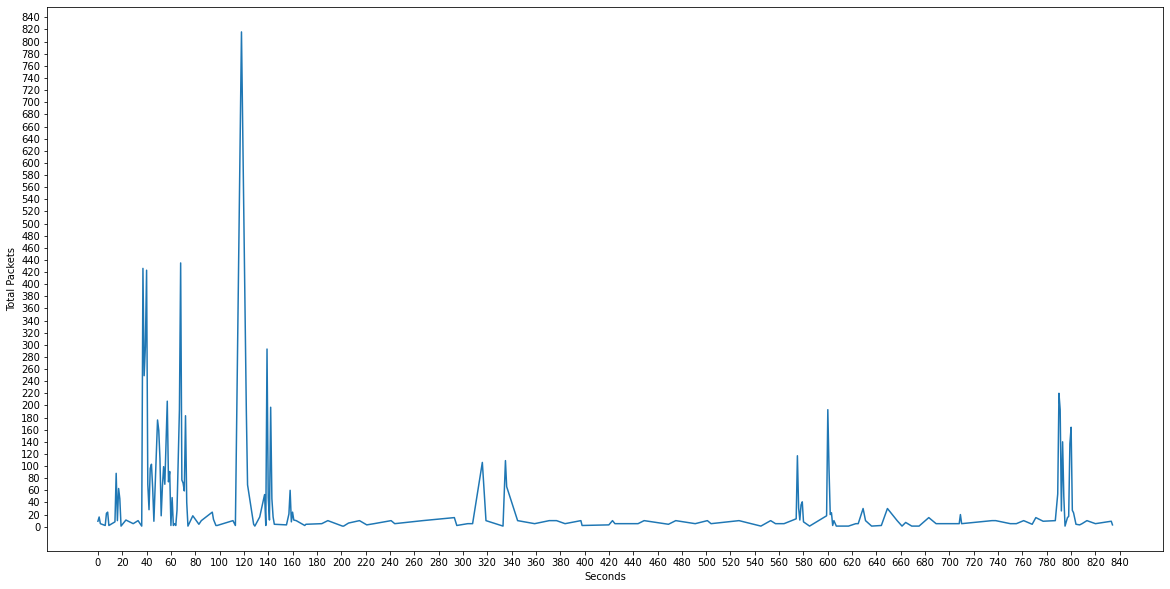

In [3]:

#Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling.


rounded_seconds = [round(second) for second in data["Time"]]
x,y = np.unique(rounded_seconds, return_counts=True)

#Increase the size of the plot to make the labels clearer 
plt.figure(figsize=(20,10))

plt.xlabel("Seconds")
plt.xticks(np.arange(0, 850, 20))
plt.ylabel("Total Packets")
plt.yticks(np.arange(0, 850, 20))

#Show the plot 
plt.plot(x,y)
plt.show()



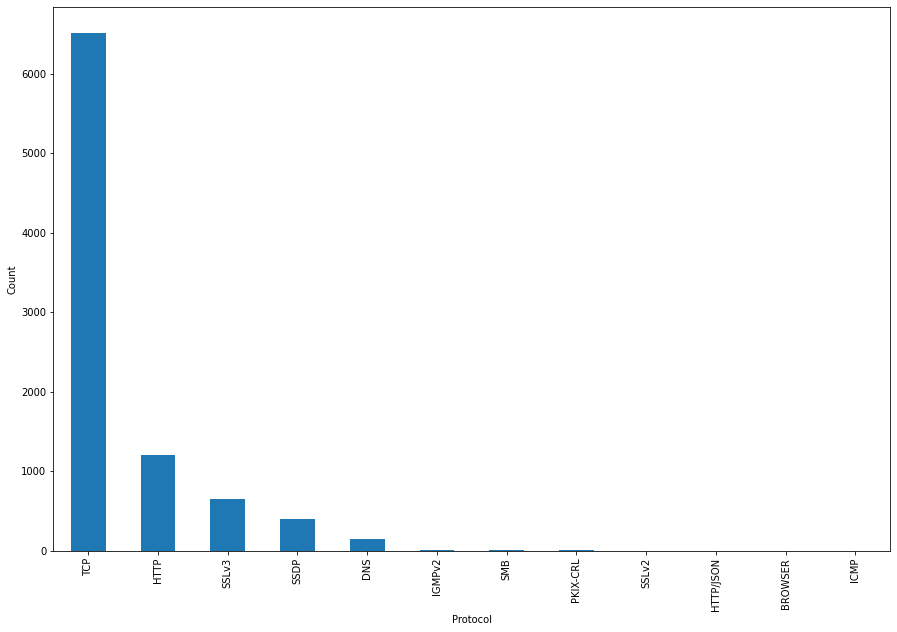

In [4]:
#Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling.

plt.figure(figsize=(15,10))
plt.ylabel("Count")
data["Protocol"].value_counts().plot.bar()
plt.show()



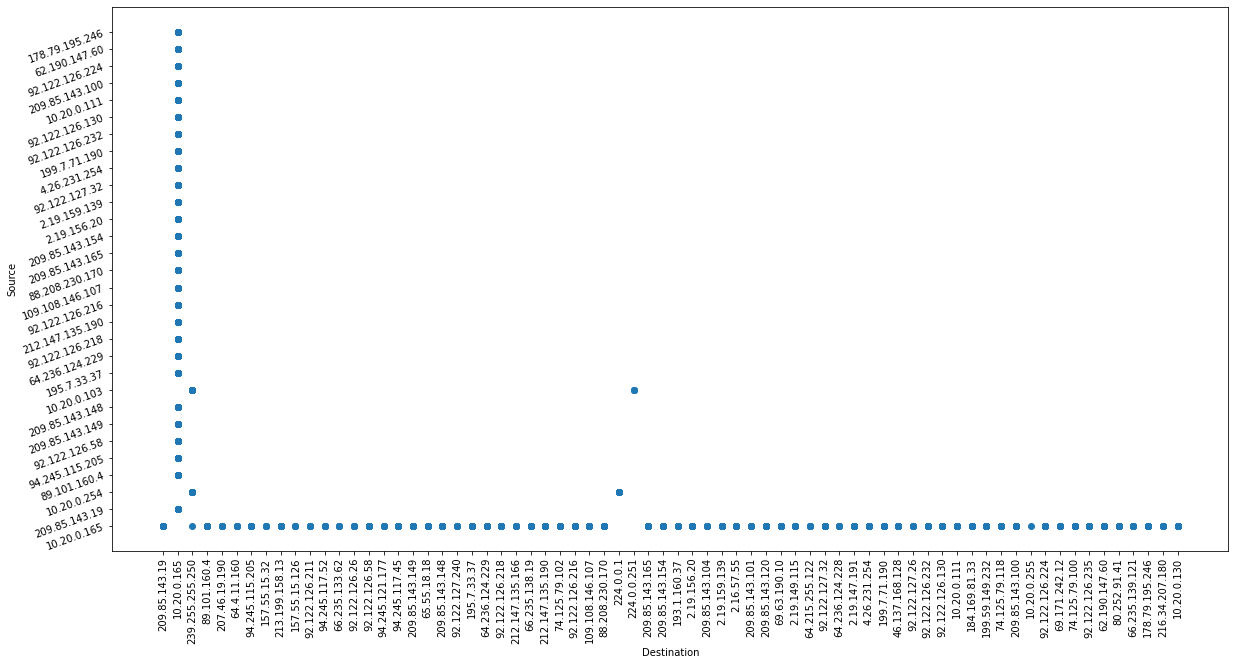

In [5]:
#Question 3: Display a Scatter Chart that shows the association between Source and Destination data.

y = data["Source"]
x = data["Destination"]

plt.figure(figsize=(20,10))

plt.xticks(rotation=90)
plt.xlabel("Destination")

plt.yticks(rotation=20)
plt.ylabel("Source")

plt.scatter(x, y)
plt.show()

,Old_Label,New_Label
0,10.20.0.103,0
1,10.20.0.111,1
2,10.20.0.130,2
3,10.20.0.165,3
4,10.20.0.254,4
...,...,...
67,92.122.127.32,67
68,94.245.115.205,68
69,94.245.117.45,69
70,94.245.117.52,70


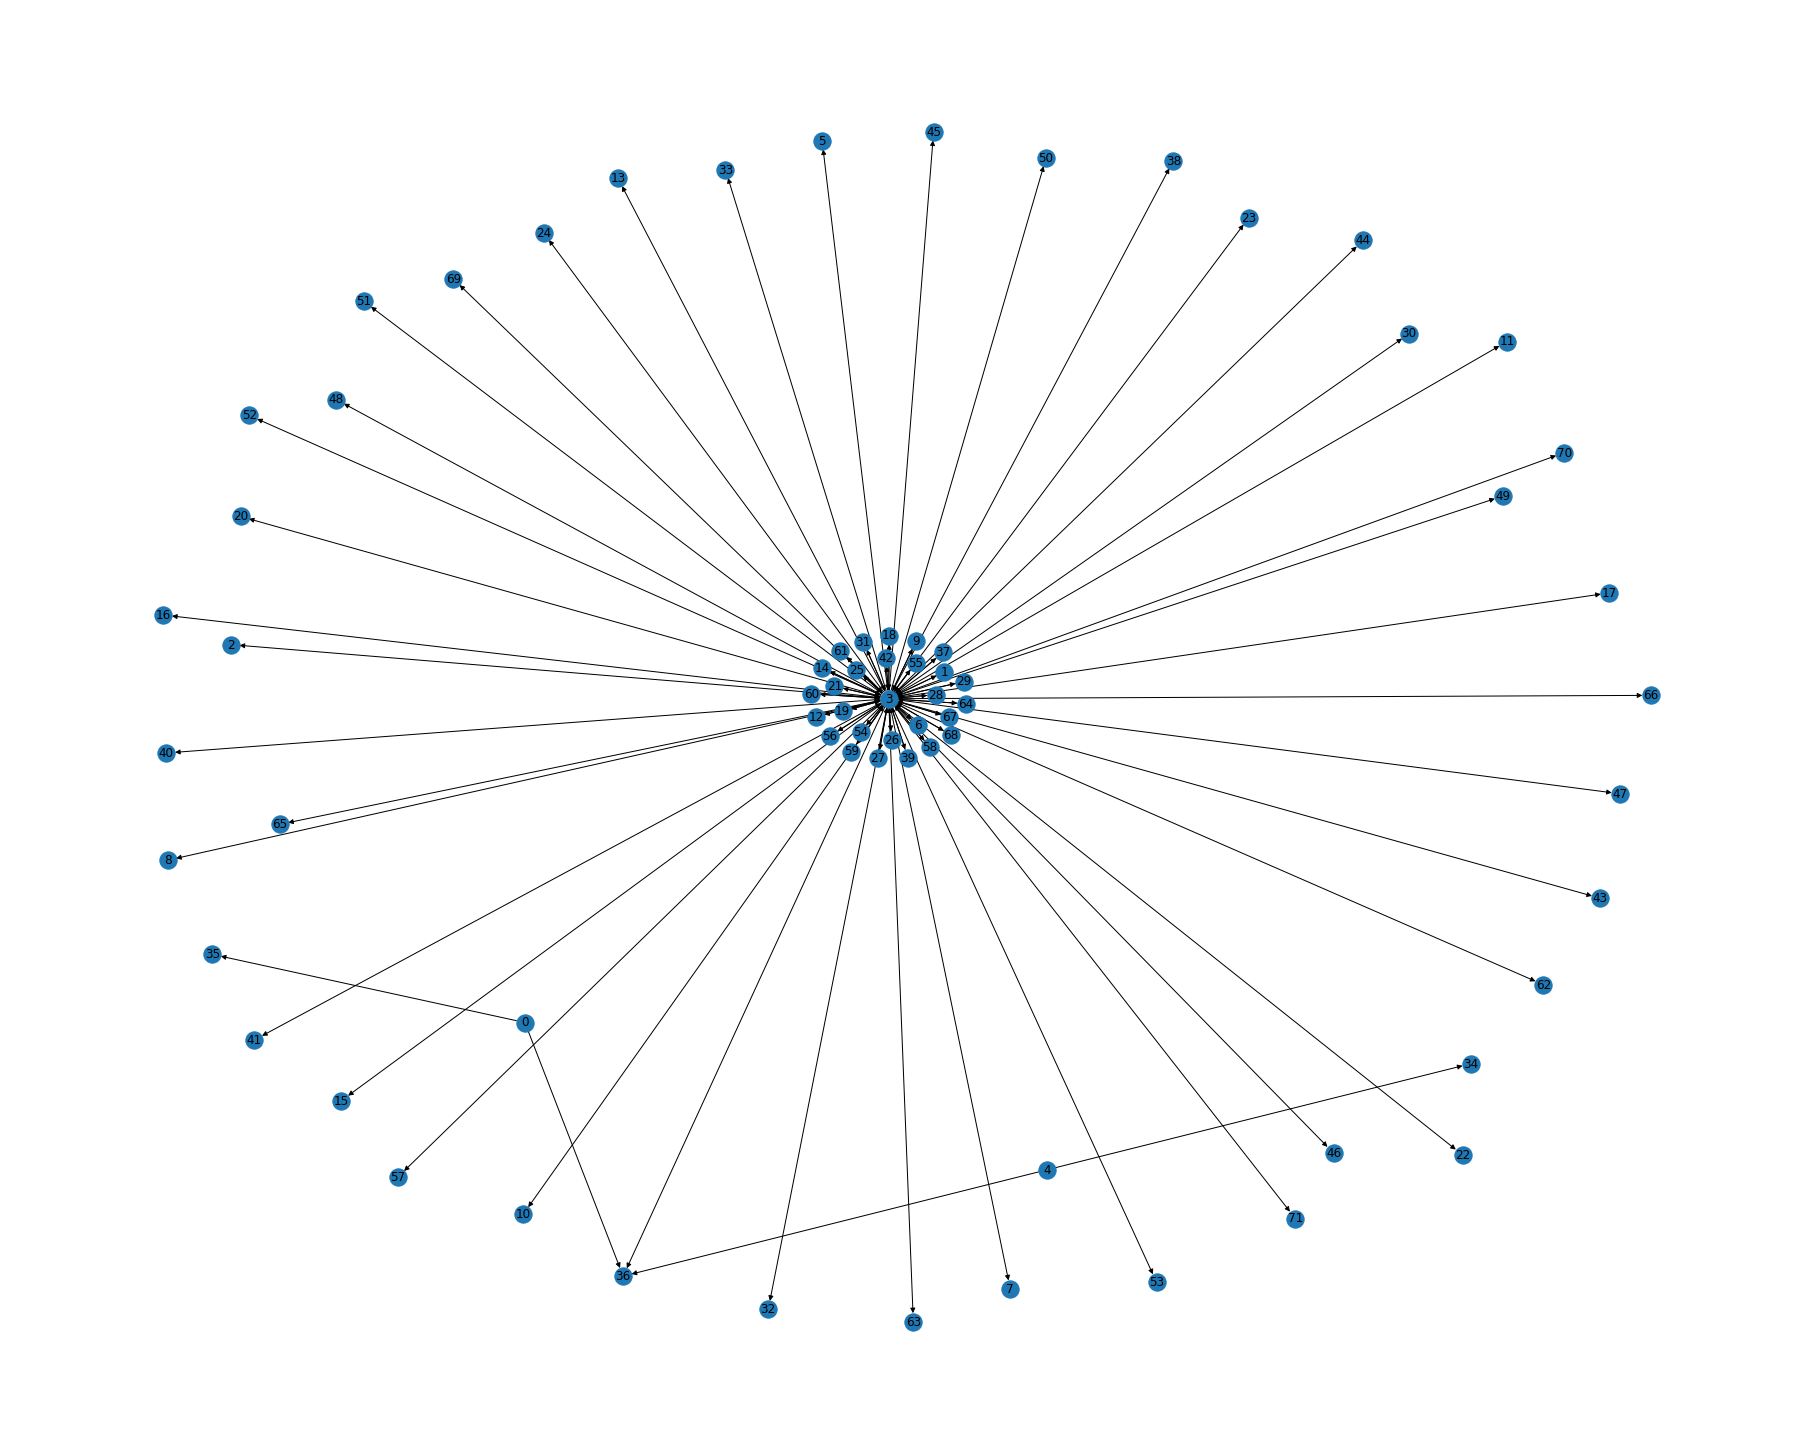

In [6]:
#Question 4: Display the data as a node link diagram using Source and Destination as your edges.

#To-Do explain 

data_points = np.append(data["Source"], data["Destination"])
data_points = np.unique(data_points)
labels_for_data_points = {old_label : new_label for new_label, old_label in enumerate(data_points)}
labels_for_data_points_df = pd.DataFrame(data = {"Old_Label" : labels_for_data_points.keys(), "New_Label" : labels_for_data_points.values()})


edges_df = pd.concat([data["Source"], data["Destination"]], axis = 1)
edges_df = edges_df.groupby(edges_df.columns.tolist(),as_index=False).size()
#finding the edges and how often they used (this is for labeling the edges with frequency of use)
edges_labels = {}
for i in range(len(edges_df)):
    edges_labels[(edges_df["Source"].iloc[i], edges_df["Destination"].iloc[i])] = edges_df["size"].iloc[i]

G = nx.DiGraph()

#add the edges 
for key in edges_labels.keys():
    G.add_edge(key[0], key[1])#, weight = edges_labels[key])

#checking if we added all the nodes
assert(len(data_points) == len(G.nodes()))


plt.figure(figsize=(25,20))

#I Trued to draw labels of the frequency of packets being sent over the edges but the labels were all over the place
# and so I've left it out
# pos = nx.spring_layout(G)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels)

#I relabled the nodes because having the IP addresses as the labels was messy and unclear
nx.relabel_nodes(G, labels_for_data_points, copy = False)
nx.draw(G, with_labels = True)

#printed the conversion chart to see which IP belongs to the new labels
labels_for_data_points_df



In [34]:
# Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False
# Yes - the wording is deliberate as it guides you on how you need this structured in your data. What you are seeking is a column for each protocol (where the column title is the protocol name).
# Then, each row of the column would be either a True or False value based on whether that particular row uses that particular protocol.

protocols = data["Protocol"].unique()
protocols_dict = {protocol : False for protocol in protocols}

protocols_df = pd.DataFrame(columns=protocols)

for _, row in data.iterrows():
    protocols_dict[row["Protocol"]] = True
    protocols_df.loc[row.name] = protocols_dict.values()
    protocols_dict[row["Protocol"]] = False
    
protocols_df
    

    
    

,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9380,False,False,False,False,False,False,False,False,False,False,False,True
9382,False,False,False,False,False,False,False,False,False,False,False,True
9384,False,False,False,False,False,False,False,False,False,False,False,True
9386,False,False,False,False,False,False,False,False,False,False,False,True


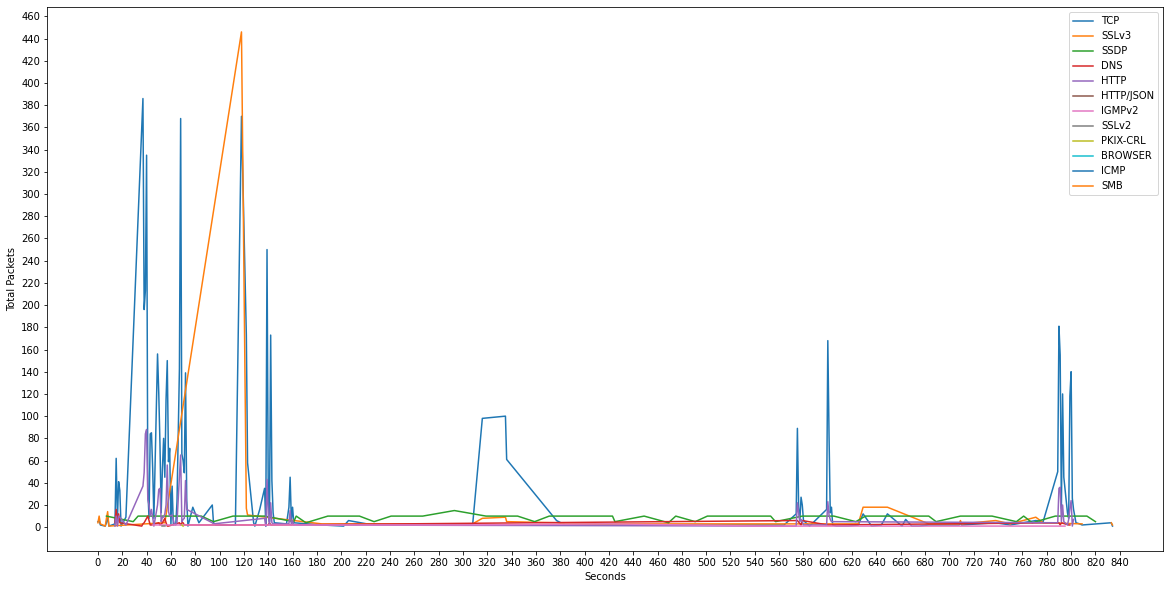

In [ ]:

#Question 6: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol on the y-axis and "Seconds" on the x-axis. 
#You should display a legend that states the colour of each protocol.

#find all lines for each protocol 
#for each protocol compile packet lengths and compile secons, plot 
plt.figure(figsize=(20,10))
max_packet_size = 0

protocols = data["Protocol"].unique().tolist()
for protocol in protocols:
    
    protocol_df = data[data["Protocol"] == protocol]
    rounded_seconds = [round(seconds) for seconds in protocol_df["Time"]]
    x,y = np.unique(rounded_seconds, return_counts=True)
    
        
    plt.plot(x, y, label = protocol)

plt.xlabel("Seconds")
plt.xticks(np.arange(0, 850, 20))
plt.ylabel("Total Packets")
plt.yticks(np.arange(0, 480, 20))
plt.legend()
plt.show()

Question 7 

Q1: One large spike at the start, which is longer and taller than the others, this could indicate something like a DDOS attack. We would need to more data to prove that spike is abnormal.

Q2 : This data shows that TCP is the most popular protocol. We could use this data to look for attacks if one of the other protocols spikes unpredictably.

Q3: This shows that data is largely sent from and received by only one IP address. There are a few outliers. These outliers could be malicious, possibly a man in the middle attack.

Q4: Nodes 0 and 4 (10.20.0.103 and 10.20.0.254) look suspicious. Most communication goes through node 3 (10.20.0.165) whereas 0 and 4 seem to present themselves as the controlling node for a few of the packets sent. 

Q5: From what I can see this doesn’t provide any insights that couldn’t be gathered from the original table.

Q6: This shows that the spikes in Q1 are mainly caused by packets using TCP. We have one outlier SSLv3, which peaks and then dies. This shows usual behaviour and could be a sign of an attack. 